In [55]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [56]:
def read_from_file(filename):
    my_list = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            my_list.append([float(i[1:-1]) for i in row])
    return my_list

In [57]:
def read_rates(filename):
    server_1_rates = []
    server_2_rates = []
    server_3_rates = []
    server_4_rates = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            server_1_rates.append([float(i.replace('[', '').replace(']', '')) for i in row[:88]])
            server_2_rates.append([float(i.replace('[', '').replace(']', '')) for i in row[88:176]])
            server_3_rates.append([float(i.replace('[', '').replace(']', '')) for i in row[176:264]])
            server_4_rates.append([float(i.replace('[', '').replace(']', '')) for i in row[264:]])
    return server_1_rates, server_2_rates, server_3_rates, server_4_rates


def get_mean_rates(rates_from_file):
    server_1_rates, server_2_rates, server_3_rates, server_4_rates = rates_from_file
    mean_server_1_rates = [np.mean(list(rates)) for rates in server_1_rates]
    mean_server_2_rates = [np.mean(list(rates)) for rates in server_2_rates]
    mean_server_3_rates = [np.mean(list(rates)) for rates in server_3_rates]
    mean_server_4_rates = [np.mean(list(rates)) for rates in server_4_rates]
    return mean_server_1_rates, mean_server_2_rates, mean_server_3_rates, mean_server_4_rates

In [61]:
utilities_0 = read_from_file('base_scripts/results/e0.5/utilities.csv')
rates_from_file_0 = read_rates('base_scripts/results/e0.5/rates.csv')
mean_rates_0 = get_mean_rates(rates_from_file_0)

In [62]:
num_of_servers = 4

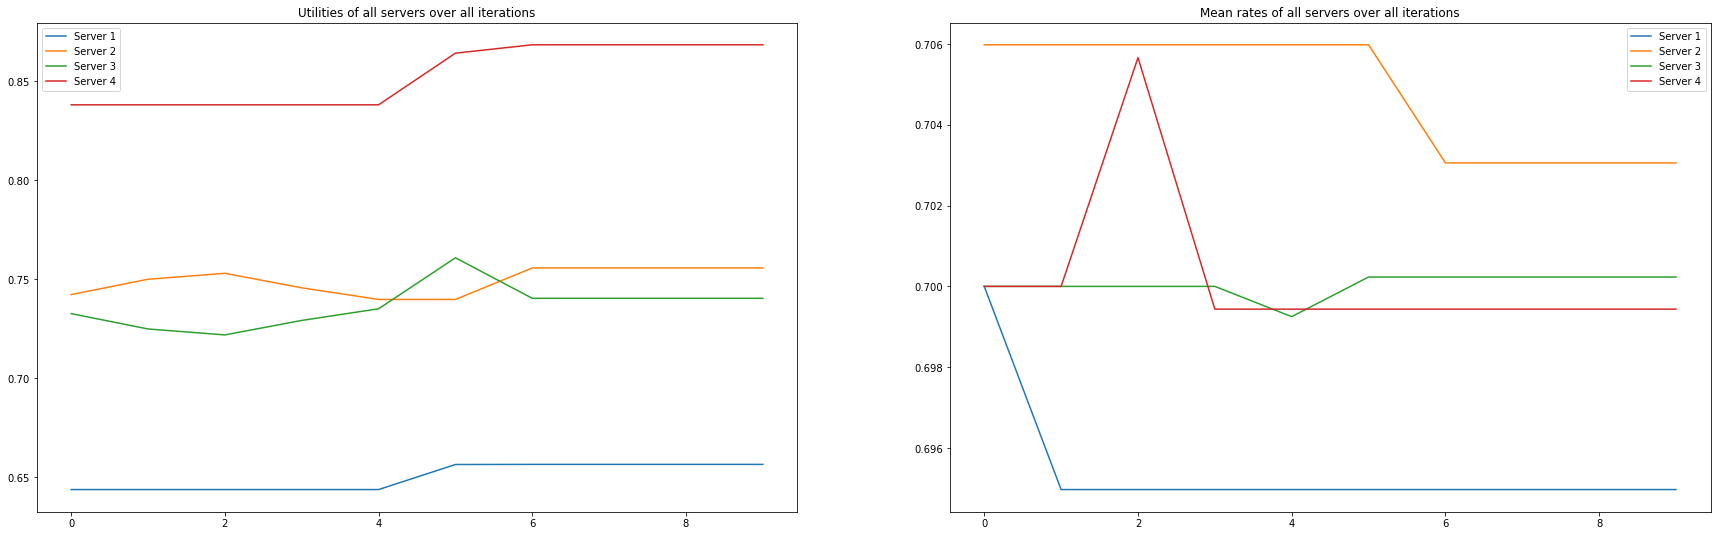

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 9))
for srv in range(num_of_servers):
    ax1.plot([util[srv] for util in utilities_0])
ax1.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax1.set_title("Utilities of all servers over all iterations")

for srv in range(num_of_servers):
    ax2.plot(mean_rates_0[srv])
    ax2.legend([f"Server {srv}" for srv in range(1, num_of_servers + 1)])
ax2.set_title("Mean rates of all servers over all iterations")
plt.show()